## Imports

In [1]:
!pip install fasteda
!pip install cufflinks
!pip install plotly_express
!pip install scikit-learn
!pip install transformers -U -q
!pip install sentencepiece

  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4722 sha256=fcc3d73507529d9b2c553d2759e4f6c35bcf533bbb8dee4cc1d8bd20bb2d2a9a
  Stored in directory: /root/.cache/pip/wheels/1b/7c/6a/e69ca45b2d5bbe3434f6c36398d1f73b4ef1408864458b31ff
Successfully built fasteda


In [2]:
import os
import pandas as pd
import numpy as np
from fasteda import fast_eda
import cufflinks as cf
from collections import Counter
import plotly_express as pe
import re
import tensorflow as tf
from string import digits
import string
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
from sklearn.utils import shuffle

2025-05-19 14:06:29.062132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747663589.244111      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747663589.299519      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:


# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Load dataset
file_path = "Hindi_English_Truncated_Corpus.csv"  # Specify the actual filename
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "umasrikakollu72/hindi-english-truncated-corpus",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:")
print(df.head())

/tmp/ipykernel_35/1181512528.py:7: DeprecationWarning:

load_dataset is deprecated and will be removed in a future version.



First 5 records:
      source                                   english_sentence  \
0        ted  politicians do not have permission to do what ...   
1        ted         I'd like to tell you about one such child,   
2  indic2012  This percentage is even greater than the perce...   
3        ted  what we really mean is that they're bad at not...   
4  indic2012  .The ending portion of these Vedas is called U...   

                                      hindi_sentence  
0  राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...  
1  मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...  
2   यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।  
3     हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते  
4        इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।  


## Dataframe Head

In [7]:
df.head(100)

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।
...,...,...,...
95,ted,"when the space race was going on,","जब ये अंतरिक्ष प्रतिस्पर्धा पूरे ज़ोर पर था,"
96,tides,Perhaps there are problems that you do n't kno...,"शायद कुछ ऐसी समस्याएँ हों , जिनके बारे में आप ..."
97,ted,I was forced to get a paper route at 10 years ...,दस साल की उम्र में मुझे जबरदस्ती अखबार बेचना भ...
98,tides,The religious leaders were fully conscious of ...,धार्मिक नेता इसके प्रति पूरी तरह से सजग थे तथा...


In [8]:
# print(df.iloc[84914])


## Dataframe Tail

In [9]:
df = df.head(20000)  # Keeps first 10k rows

In [10]:
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [11]:
df.tail()

,source,english_sentence,hindi_sentence
19995,ted,of a cell phone with a video in it.,सीमित हों.
19996,indic2012,"As per this secret scheme, Bhagat Singh and Ra...",सोची गई योजना के अनुसार भगत सिंह और राजगुरु सै...
19997,indic2012,Mozilla Firefox web browser is based on Seamon...,सीमंकी (पूर्व में मोजिल्ला) पर मोजिल्ला फायरफा...
19998,tides,The bas- relief sculptures of Durga on the sou...,रामानुज मंडपम की दक्षिणी दीवार पर दुर्गा की और...
19999,tides,So Panchanan and his uncle Sukhdev left home i...,इसलिए सत्रहवीं सदी के अंतिम दशक में पंचानन और ...


## Dataframe Info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source            20000 non-null  object
 1   english_sentence  20000 non-null  object
 2   hindi_sentence    20000 non-null  object
dtypes: object(3)
memory usage: 468.9+ KB


## Dataframe Missing Values

In [13]:
df.isna().sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

In [14]:
len(df)

20000

## Dropping Missing Records

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

## Dataframe Description

In [17]:
df.describe()

,source,english_sentence,hindi_sentence
count,20000,20000,20000
unique,3,19692,18424
top,tides,(Laughter),(हँसी)
freq,7903,103,43


## Tokens and Char Count

In [18]:
cf.set_config_file(offline=True)
df["eng_char_count"] = df["english_sentence"].str.len()
df["hindi_char_count"] = df["hindi_sentence"].str.len()
df["hindi_tok_count"] = df["hindi_sentence"].str.split(" ").str.len()
df["eng_tok_count"] = df["english_sentence"].str.split(" ").str.len()

## Most Common Words

In [19]:
tot_eng_sen = ""
for eng_sent in df["english_sentence"].tolist():
    tot_eng_sen += eng_sent + " "

Counter(tot_eng_sen.split(" ")).most_common(10)

[('the', 18490),
 ('of', 11951),
 ('and', 8597),
 (',', 8395),
 ('.', 8046),
 ('to', 7452),
 ('in', 6603),
 ('a', 5468),
 ('is', 4625),
 ('that', 2733)]

In [20]:
tot_hindi_sen = ""
for hin_sent in df["hindi_sentence"].tolist():
    tot_hindi_sen += hin_sent + " "

Counter(tot_hindi_sen.split(" ")).most_common(10)

[('के', 13967),
 ('में', 9973),
 ('की', 7821),
 ('है', 7713),
 ('.', 7594),
 ('और', 7378),
 ('से', 6153),
 (',', 5278),
 ('का', 5165),
 ('को', 5020)]

## Fast EDA

In [21]:
fast_eda(df[["source", "eng_char_count", 	"hindi_char_count", 	"hindi_tok_count", 	"eng_tok_count",]])

DataFrame Head:


,source,eng_char_count,hindi_char_count,hindi_tok_count,eng_tok_count
0,ted,63,68,14,12
1,ted,42,50,11,9
2,indic2012,61,48,9,10


DataFrame Tail:


,source,eng_char_count,hindi_char_count,hindi_tok_count,eng_tok_count
19997,indic2012,68,72,10,11
19998,tides,291,268,53,49
19999,tides,238,227,49,46


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(20000, 5)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source            20000 non-null  object
 1   eng_char_count    20000 non-null  int64 
 2   hindi_char_count  20000 non-null  int64 
 3   hindi_tok_count   20000 non-null  int64 
 4   eng_tok_count     20000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 781.4+ KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



/usr/local/lib/python3.11/dist-packages/fasteda/__init__.py:86: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.11/dist-packages/fasteda/__init__.py:86: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'eng_char_count      20000
hindi_char_count    20000
hindi_tok_count     20000
eng_tok_count       20000
Name: count, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.11/dist-packages/fasteda/__init__.py:86: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'eng_char_count      90.632
hindi_char_count    89.278
hindi_tok_count     18.118
eng_tok_count       16.317
Name: mean, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.11/dist-packages

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
eng_char_count,20000,90.632,66,83.885,1,38,66,119,1296,3.569764,25.722888
hindi_char_count,20000,89.278,65,87.384,2,37,65,116,1526,3.996325,29.991260
hindi_tok_count,20000,18.118,13,17.078,1,8,13,24,314,3.739345,27.664793
eng_tok_count,20000,16.317,12,14.82,1,7,12,22,218,3.241207,21.123813


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



ValueError: could not convert string to float: 'ted'

<Figure size 1200x800 with 0 Axes>

<a id='da'></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Discussing Approaches</p>

### In this perticular section i will be discussing the multiple approches  of Machine Translation collected from multple reseach papers and articles and will pick one of them to implement on selected dataset.

For implementing this solution , Going with Neural Machine Translation Implementation. So far as per out data we have english corpus and its actual translated hindi sentences. along with then after doing feature engineering we now have corpus char count and its token distribution.

Sample dataframe looks like below:

In [25]:
df

,source,english_sentence,hindi_sentence,eng_char_count,hindi_char_count,hindi_tok_count,eng_tok_count
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...",63,68,14,12
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...,42,50,11,9
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।,61,48,9,10
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते,64,46,11,12
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।,55,43,8,9
...,...,...,...,...,...,...,...
19995,ted,of a cell phone with a video in it.,सीमित हों.,35,10,2,9
19996,indic2012,"As per this secret scheme, Bhagat Singh and Ra...",सोची गई योजना के अनुसार भगत सिंह और राजगुरु सै...,101,96,20,19
19997,indic2012,Mozilla Firefox web browser is based on Seamon...,सीमंकी (पूर्व में मोजिल्ला) पर मोजिल्ला फायरफा...,68,72,10,11
19998,tides,The bas- relief sculptures of Durga on the sou...,रामानुज मंडपम की दक्षिणी दीवार पर दुर्गा की और...,291,268,53,49


## <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Pre Processing</p>

In This Section datase will be prepared for training , the list of steps will be implemented is mentioned as below:

1. Lower casing dataframe Enlish and Hindi Corpus
2. Removing Quotes
3. Removing all special characters
4. Remove all numbers from text
5. Add start and end tokens to target sequences
6. Building English and Hindi Vocabulary





In [26]:
df=df[df['source']=='ted']

In [27]:
df.english_sentence = df.english_sentence.apply(lambda x: x.lower())
df.hindi_sentence = df.hindi_sentence.apply(lambda x: x.lower())

In [28]:
import re
df.english_sentence = df.english_sentence.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", ' ', x))
df.hindi_sentence = df.hindi_sentence.apply(lambda x: re.sub("'", '', x)).apply(lambda x: re.sub(",", ' ', x))

In [29]:
df['english_sentence']=df['english_sentence'].apply(lambda x: re.sub("'", '', x))
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

In [30]:
exclude = set(string.punctuation)
df['english_sentence']=df['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [31]:
remove_digits = str.maketrans('', '', digits)
df['english_sentence']=df['english_sentence'].apply(lambda x: x.translate(remove_digits))
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: x.translate(remove_digits))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

df['english_sentence']=df['english_sentence'].apply(lambda x: x.strip())
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: x.strip())
df['english_sentence']=df['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))

In [32]:
df.sample(5)

,source,english_sentence,hindi_sentence,eng_char_count,hindi_char_count,hindi_tok_count,eng_tok_count
3875,ted,theres no real sense of separation from me in ...,विस्थापित होने का भाव घनीभूत नहीं है,56,37,7,11
350,ted,and i started watching kaki king a lot,और मैंने काकी किंग को देखना शुरू किया,39,38,8,8
13409,ted,exploitation by landlords,जमींदारों द्वारा शोषण,26,22,3,3
9957,ted,it shuts down the prefrontal cortex the parts ...,यह prefrontal प्रांतस्था को बंद कर देता हैं जो...,59,57,11,10
5019,ted,video singing,विडियोगीत,18,14,1,2


In [33]:
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x :'START_ ' + x + ' _END')

In [34]:
df

,source,english_sentence,hindi_sentence,eng_char_count,hindi_char_count,hindi_tok_count,eng_tok_count
0,ted,politicians do not have permission to do what ...,START_ राजनीतिज्ञों के पास जो कार्य करना चाहिए...,63,68,14,12
1,ted,id like to tell you about one such child,START_ मई आपको ऐसे ही एक बच्चे के बारे में बता...,42,50,11,9
3,ted,what we really mean is that theyre bad at not ...,START_ हम ये नहीं कहना चाहते कि वो ध्यान नहीं ...,64,46,11,12
7,ted,and who are we to say even that they are wrong,START_ और हम होते कौन हैं यह कहने भी वाले कि व...,48,48,13,11
13,ted,so there is some sort of justice,START_ तो वहाँ न्याय है _END,32,16,4,7
...,...,...,...,...,...,...,...
19959,ted,so that we can stop compartmentalizing form fu...,START_ ताकि हम रूप उपयोगिता और सौंदर्य को अलग ...,68,69,14,10
19963,ted,and that is so deeply important to us,START_ और वह हमारे लिए बहुत ज्यादा महत्तवपूर्ण...,38,43,8,8
19985,ted,and that means that every medium,START_ और इसका मतलब है कि हर माध्यम _END,32,28,7,6
19988,ted,as general purpose computing devices,START_ कम्प्यूटर नुमा गतिविधियों को इस्तेमाल न...,37,49,8,5


In [35]:
all_eng_words=set()
for eng in df['english_sentence']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words=set()
for hin in df['hindi_sentence']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

In [36]:
df['length_eng_sentence']=df['english_sentence'].apply(lambda x:len(x.split(" ")))
df['length_hin_sentence']=df['hindi_sentence'].apply(lambda x:len(x.split(" ")))

In [37]:
df.head()

,source,english_sentence,hindi_sentence,eng_char_count,hindi_char_count,hindi_tok_count,eng_tok_count,length_eng_sentence,length_hin_sentence
0,ted,politicians do not have permission to do what ...,START_ राजनीतिज्ञों के पास जो कार्य करना चाहिए...,63,68,14,12,12,15
1,ted,id like to tell you about one such child,START_ मई आपको ऐसे ही एक बच्चे के बारे में बता...,42,50,11,9,9,13
3,ted,what we really mean is that theyre bad at not ...,START_ हम ये नहीं कहना चाहते कि वो ध्यान नहीं ...,64,46,11,12,12,13
7,ted,and who are we to say even that they are wrong,START_ और हम होते कौन हैं यह कहने भी वाले कि व...,48,48,13,11,11,15
13,ted,so there is some sort of justice,START_ तो वहाँ न्याय है _END,32,16,4,7,7,6


In [38]:
# printing length of words in each language
print('length of english words: ', len(all_eng_words))
print('length of hindi words: ', len(all_hindi_words))

length of english words:  6549
length of hindi words:  7760


In [39]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)
num_encoder_tokens, num_decoder_tokens

(6549, 7760)

In [40]:
num_decoder_tokens += 1 #for zero padding

In [41]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [42]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [43]:
df = shuffle(df)
df.head(10)

,source,english_sentence,hindi_sentence,eng_char_count,hindi_char_count,hindi_tok_count,eng_tok_count,length_eng_sentence,length_hin_sentence
2666,ted,if you spin something it tends to fly out,START_ अगर आप कुछ घुमायेंगे तो वो बाहर की तरफ़...,43,48,10,9,9,12
2256,ted,about a dollar seed grant initiative seed gran...,START_ अमरीकी डालर के बीज अनुदान कार्यक्रम के ...,102,67,12,15,14,13
14456,ted,or improve your marriage,START_ या अपनी शादीशुदा जीवन को बेहतर बनाना चा...,25,43,8,4,4,10
2123,ted,need more resources and need our help,START_ उन्हें साधन और हमारी सहायता की जरुरत है...,38,40,8,7,7,10
7276,ted,laughter,START_ हँसी _END,10,6,1,1,1,3
7391,ted,propane gas kerosene or consumables,START_ प्रोपेन गैस मिट्टी का तेल या उपभोग्य सा...,45,66,10,8,5,13
16014,ted,i personally think that its easier to actually...,START_ मैं व्यक्तिगत रूप से सोचता हूँ कि एक जग...,62,54,12,11,11,14
17036,ted,but one of the questions is this should be to you,START_ पर अब आपके मन में ये सवाल आएगा _END,54,32,9,13,11,10
6989,ted,music,START_ संगीत _END,7,7,1,1,1,3
18791,ted,the one below likes to fire,START_ और जो नीचे है वो तरंग भेजती है _END,27,30,8,6,6,10


In [44]:
# getting maximum sentence length of english sentences
length_list = []
for l in df.english_sentence:
    length_list.append(len(l.split(' ')))

max_input_length = np.max(length_list)
print('max_input_length: ', max_input_length)

max_input_length:  19


In [45]:
 #getting maximum sentence length of Hindi sentences
length_list = []
for l in df.hindi_sentence:
    length_list.append(len(l.split(' ')))

max_output_length = np.max(length_list)
print('max_output_length: ', max_output_length)

max_output_length:  32


In [46]:
df_=df[df['length_eng_sentence']<=20]
df_=df[df['length_hin_sentence']<=20]

In [47]:
print("maximum length of Hindi Sentence ",max(df['length_hin_sentence']))
print("maximum length of English Sentence ",max(df['length_eng_sentence']))

maximum length of Hindi Sentence  32
maximum length of English Sentence  19


In [48]:
x, y = df['english_sentence'], df['hindi_sentence']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5,random_state=42)
x_train.shape, x_test.shape

((3085,), (3085,))

In [49]:
x_train

5936     with the kind assistance of the nigerian gover...
8844     and it swings its leg between the two legs and...
9855                                  the problem in libya
11270    were always looking for little good things tha...
1622                                              applause
                               ...                        
9359     lowcost family restaurant chain for those of y...
14093                                           remarkably
11232                i work in morocco in turkey in mexico
8596                            and put a third matchstick
16438    and she thought it was too funny to not includ...
Name: english_sentence, Length: 3085, dtype: object

In [50]:
y_train

5936                START_ नाइजीरियाई सरकार कि मदद से _END
8844     START_ यह गिरने से बचने के लिए दो पैरों के बीच...
9855                         START_ लीबिया में समस्या _END
11270    START_ हम हमेशा उन छोटी छोटी अच्छी चीजें को दे...
1622                                   START_ तालियाँ _END
                               ...                        
9359     START_ जो नहीं जानते हैं उनकी जानकारी के लिए ब...
14093                           START_ असाधारण रूप से _END
11232    START_ मैं मोरक्को में तुर्की में मेक्सिको में...
8596           START_ और एक तीसरी दियासलाई भी लगा दें _END
16438    START_ उसे लगा कि मैं मजाकिया हूँ और इसीलिये इ...
Name: hindi_sentence, Length: 3085, dtype: object

In [51]:
x_train.to_pickle('x_train.pkl')
x_test.to_pickle('x_test.pkl')

<a id = "transformer"></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Basic Implementation Using Transformer</p>

## Overview of MBart

The MBart model was presented in Multilingual Denoising Pre-training for Neural Machine Translation by Yinhan Liu, Jiatao Gu, Naman Goyal, Xian Li, Sergey Edunov Marjan Ghazvininejad, Mike Lewis, Luke Zettlemoyer.

According to the abstract, MBART is a sequence-to-sequence denoising auto-encoder pretrained on large-scale monolingual corpora in many languages using the BART objective. mBART is one of the first methods for pretraining a complete sequence-to-sequence model by denoising full texts in multiple languages, while previous approaches have focused only on the encoder, decoder, or reconstructing parts of the text.

 Documentation resources

- [Text classification task guide](https://huggingface.co/docs/transformers/model_doc/tasks/sequence_classification)
- [Question answering task guide](https://huggingface.co/docs/transformers/model_doc/tasks/question_answering)
- [Causal language modeling task guide](https://huggingface.co/docs/transformers/model_doc/tasks/language_modeling)
- [Masked language modeling task guide](https://huggingface.co/docs/transformers/model_doc/tasks/masked_language_modeling)
- [Translation task guide](https://huggingface.co/docs/transformers/model_doc/tasks/translation)
- [Summarization task guide](https://huggingface.co/docs/transformers/model_doc/tasks/summarization)


Documnetation Link : https://huggingface.co/docs/transformers/model_doc/mbart

In [52]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
import tensorflow as tf

In [53]:
#Training
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/717 [00:00<?, ?B/s]

In [54]:
def translate(in_text):
    model_inputs = tokenizer(in_text, return_tensors="pt")

    generated_tokens = model.generate(
        **model_inputs,
        forced_bos_token_id=tokenizer.lang_code_to_id["hi_IN"]
    )
    translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
    return translation

In [55]:
temp_df  = df["english_sentence"].head(10)
res = temp_df.apply(translate)

In [56]:
print(f"English : {temp_df.iloc[0]}\nTranslated Hindi : {res.iloc[0][0]}\nOriginal Hindi : {df['hindi_sentence'].iloc[0].replace('START_', '').replace('_END', '')}")

English : if you spin something it tends to fly out
Translated Hindi : यदि आप कुछ घुमाना चाहते हैं तो यह बाहर उड़ने की प्रवृत्ति है
Original Hindi :  अगर आप कुछ घुमायेंगे तो वो बाहर की तरफ़ भागेगा। 


In [57]:
del model
del tokenizer

<a id = "encdec"></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Basic Implementation Using Encoder & Decoder</p>

There is a three basic step process which is summarised below:

    1) Turn the sentences into 3 Numpy arrays, encoder_input_data, decoder_input_data, decoder_target_data:
        encoder_input_data is a 3D array of shape (num_pairs, max_english_sentence_length, num_english_characters) containing a one-hot vectorization of the English sentences.
        decoder_input_data is a 3D array of shape (num_pairs, max_french_sentence_length, num_french_characters) containg a one-hot vectorization of the French sentences.
        decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t] will be the same as decoder_input_data[:, t + 1, :].
    2) Train a basic LSTM-based Seq2Seq model to predict decoder_target_data given encoder_input_data and decoder_input_data. Our model uses teacher forcing.
    3) Decode some sentences to check that the model is working (i.e. turn samples from encoder_input_data into corresponding samples from decoder_target_data).


In [58]:
def generate_batch(X = x_train, y = y_train, batch_size = 128):
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_input_length),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_output_length),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_output_length, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word]
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word]
                    if t>0:
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [59]:
latent_dim=300

In [60]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

<a id = "encdec_def"></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Defining Encoder & Decoder</p>

In [61]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

I0000 00:00:1747663976.883563      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747663976.884239      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [62]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [63]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

<a id = "model"></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Model Summary</p>

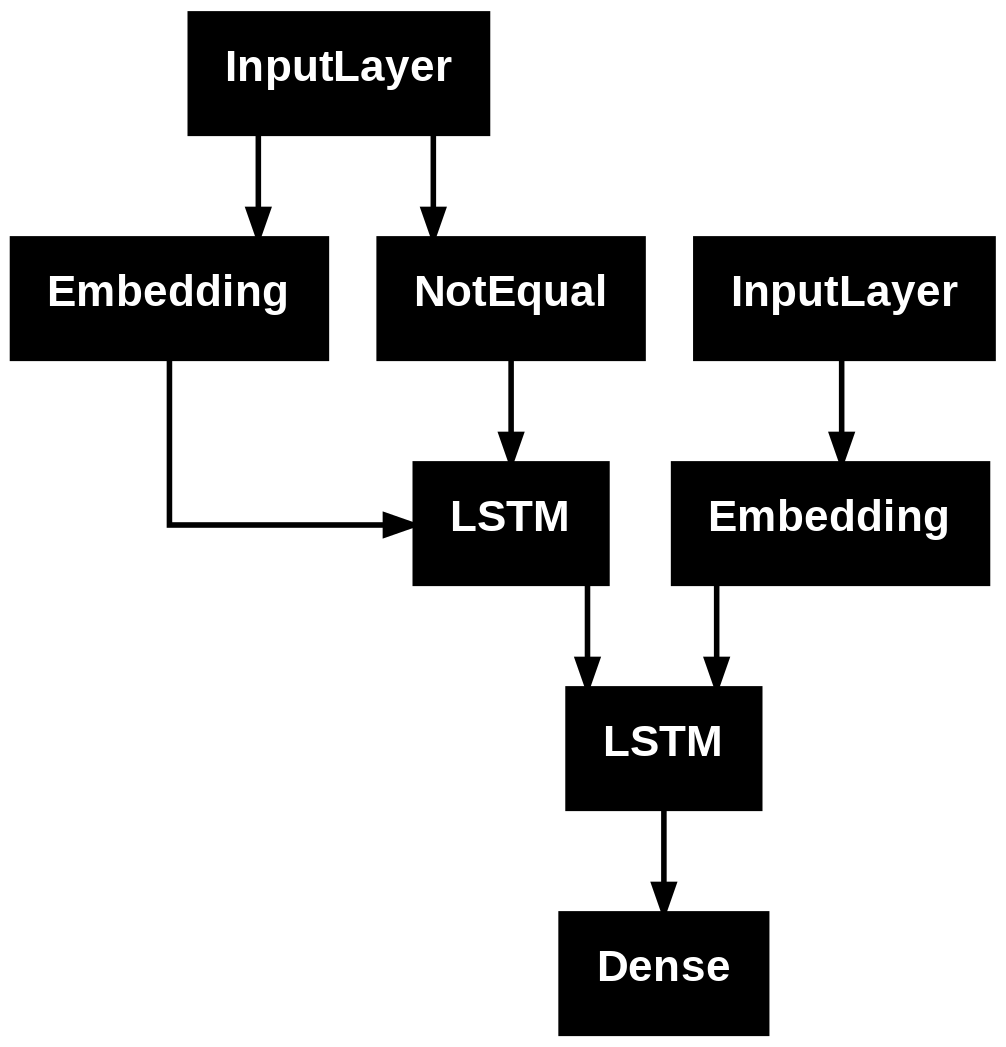

In [64]:
plot_model(model)

In [65]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 300)      │      1,964,700 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, None)           │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 300)      │      2,328,300 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 300), (None,   │        721,200 │ embedding[0][0],       │
│                           │ 300), (None, 300)]     │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 300),    │        721,200 │ embedding_1[0][0],     │
│                           │ (None, 300), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 300)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 7761)     │      2,336,061 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,071,461 (30.79 MB)

 Trainable params: 8,071,461 (30.79 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
train_samples = len(x_train)
val_samples = len(x_test)
batch_size = 128
epochs = 100

<a id = "training"></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Training</p>

In [68]:
model.fit(generate_batch(x_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(x_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

TypeError: `output_signature` must contain objects that are subclass of `tf.TypeSpec` but found <class 'list'> which is not.

In [ ]:
model.save_weights('nmt_weights.h5')

<a id = "infer"></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Inferencing</p>

In [ ]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)


In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
train_gen = generate_batch(x_train, y_train, batch_size = 1)
k=-1


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', x_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

<a id = "refer"></a>

# <p style="padding:10px;background-color:#2dfdc8 ;margin:10;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">References</p>

[1] Taking dataset from the following :https://www.kaggle.com/datasets/aiswaryaramachandran/hindienglish-corpora

[2] Dataset Source : https://www.kaggle.com/datasets/aiswaryaramachandran/hindienglish-corpora

* Papers:

[3] https://kantanmtblog.com/2019/04/02/a-short-introduction-to-the-statistical-machine-translation-model/

[4] https://en.wikipedia.org/wiki/Warren_Weaver

[5] https://ieeexplore.ieee.org/document/8281851

[6] https://ieeexplore.ieee.org/document/8125965

[7] https://nlp.stanford.edu/software/lex-parser.shtml

[8] https://machinelearningmastery.com/introduction-neural-machine-translation/

[9] https://ieeexplore.ieee.org/abstract/document/9066238

[10] https://ieeexplore.ieee.org/document/8977715

* Transformer MBart:

[11] MBart Link : https://huggingface.co/docs/transformers/model_doc/mbart

* Web References:

[12] https://towardsdatascience.com/english-to-hindi-neural-machine-translation-7cb3a426491f

* Kaggle References :

[13] https://www.kaggle.com/code/aiswaryaramachandran/english-to-hindi-neural-machine-translation

[14] https://www.kaggle.com/code/aliasgartaksali/hindi-to-english-neural-machine-translation
